In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime
import json
import numpy as np
import pandas as pd
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
target_users= ["CNN" ,"BBCWorld","NYTimes","CBSNews","FoxNews"]
dictionary= {"Target User": [], "Compound List": [], "Positive List": [], "Negative List": [], "Neutral List": [], "Date and Time":[], "Tweets Ago":[]}

for user in target_users:
             
    for x in range(1,6):
        public_tweets = api.user_timeline(user,page=x)
        counter=0
        
        for tweet in public_tweets:
            dictionary["Target User"].append(user)
            results = analyzer.polarity_scores(tweet["text"])
            compound= results["compound"]
            positive= results["pos"]
            negative= results["neg"]
            neutral= results["neu"]
    
            dictionary["Compound List"].append(compound)
            dictionary["Positive List"].append(positive)
            dictionary["Negative List"].append(negative)
            dictionary["Neutral List"].append(neutral)
            
            raw_time= tweet["created_at"]
            converted_time= datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
            dictionary["Date and Time"].append(converted_time)
            counter+=1
            dictionary["Tweets Ago"].append(counter)
            

sentiment= pd.DataFrame(dictionary)
sentiment.head(10)

,Target User,Compound List,Positive List,Negative List,Neutral List,Date and Time,Tweets Ago
0,CNN,0.4215,0.220,0.110,0.671,2018-10-01 23:11:04+00:00,1
1,CNN,0.5574,0.159,0.000,0.841,2018-10-01 23:06:01+00:00,2
2,CNN,0.7906,0.280,0.000,0.720,2018-10-01 23:01:06+00:00,3
3,CNN,0.0000,0.000,0.000,1.000,2018-10-01 22:56:03+00:00,4
4,CNN,-0.8342,0.000,0.330,0.670,2018-10-01 22:51:06+00:00,5
5,CNN,-0.3400,0.000,0.156,0.844,2018-10-01 22:41:05+00:00,6
6,CNN,0.7579,0.306,0.000,0.694,2018-10-01 22:31:07+00:00,7
7,CNN,0.0000,0.000,0.000,1.000,2018-10-01 22:25:07+00:00,8
8,CNN,0.3182,0.103,0.000,0.897,2018-10-01 22:21:05+00:00,9
9,CNN,0.0000,0.000,0.000,1.000,2018-10-01 22:11:06+00:00,10


In [8]:
cnn_values=sentiment.loc[sentiment['Target User']=="CNN"]
bbc_values=sentiment.loc[sentiment['Target User']=="BBCWorld"]
nyt_values=sentiment.loc[sentiment['Target User']=="NYTimes"]
cbs_values=sentiment.loc[sentiment['Target User']=="CBSNews"]
fox_values=sentiment.loc[sentiment['Target User']=="FoxNews"]

TypeError: unhashable type: 'numpy.ndarray'

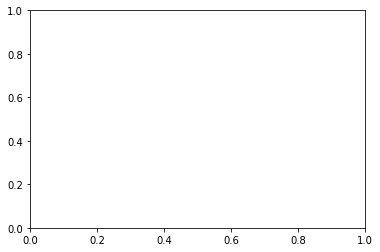